In [3]:
# Load and examine the data
data_file = r"C:\Users\jamie\OneDrive\Desktop\Jamies_CVNN\CVNN\tests\motivation_xor_results_new.csv"

# Load the data
df = pd.read_csv(data_file)

print("📋 Dataset Overview")
print("-" * 30)
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
display(df.head(10))

print("\nData types:")
print(df.dtypes)

print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].nunique() <= 10:
        print(f"  Values: {sorted(df[col].unique())}")
    print()

📋 Dataset Overview
------------------------------
Shape: (525, 6)
Columns: ['type', 'weight_init', 'bias_init', 'activation', 'lr', 'converged']

First few rows:


,type,weight_init,bias_init,activation,lr,converged
0,rvnn,normal,normal,relu,0.01,14
1,rvnn,normal,normal,relu,0.05,8
2,rvnn,normal,normal,relu,0.10,8
3,rvnn,normal,normal,sigmoid,0.01,0
4,rvnn,normal,normal,sigmoid,0.05,0
5,rvnn,normal,normal,sigmoid,0.10,0
6,rvnn,normal,normal,tanh,0.01,25
7,rvnn,normal,normal,tanh,0.05,56
8,rvnn,normal,normal,tanh,0.10,63
9,rvnn,normal,glorot_uniform,relu,0.01,16



Data types:
type            object
weight_init     object
bias_init       object
activation      object
lr             float64
converged        int64
dtype: object

Unique values per column:
type: 2 unique values
  Values: ['cvnn', 'rvnn']

weight_init: 10 unique values
  Values: ['complex_glorot_uniform', 'complex_he_normal', 'complex_normal', 'complex_ones', 'complex_zeros', 'glorot_uniform', 'he_normal', 'normal', 'ones', 'zeros']

bias_init: 10 unique values
  Values: ['complex_glorot_uniform', 'complex_he_normal', 'complex_normal', 'complex_ones', 'complex_zeros', 'glorot_uniform', 'he_normal', 'normal', 'ones', 'zeros']

activation: 7 unique values
  Values: ['complex_relu', 'complex_sigmoid', 'complex_tanh', 'jam', 'relu', 'sigmoid', 'tanh']

lr: 3 unique values
  Values: [0.01, 0.05, 0.1]

converged: 53 unique values



📈 Basic Statistics
------------------------------
Convergence Statistics:
count    525.000000
mean       6.912381
std       15.786261
min        0.000000
25%        0.000000
50%        0.000000
75%        4.000000
max       88.000000
Name: converged, dtype: float64

Total experiments: 525
RVNN experiments: 225
CVNN experiments: 300

Maximum convergences in any experiment: 88
Likely number of trials per experiment: 88 (assuming this is the max possible)

Overall success rate statistics:
count    525.000000
mean       7.854978
std       17.938933
min        0.000000
25%        0.000000
50%        0.000000
75%        4.545455
max      100.000000
Name: success_rate, dtype: float64

Checking data completeness...
RVNN unique combinations: 225
CVNN unique combinations: 300


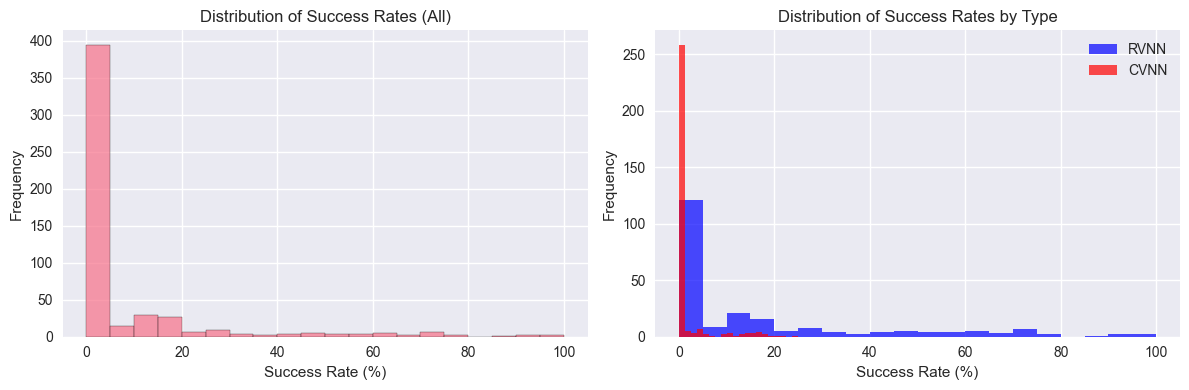

In [4]:
# Basic statistics and data exploration
print("📈 Basic Statistics")
print("-" * 30)

# Summary statistics for convergence
print("Convergence Statistics:")
print(df['converged'].describe())

print(f"\nTotal experiments: {len(df)}")
print(f"RVNN experiments: {len(df[df['type'] == 'rvnn'])}")
print(f"CVNN experiments: {len(df[df['type'] == 'cvnn'])}")

# Assume each experiment was run 100 times (common practice)
# We can infer this from the max convergence value
max_converged = df['converged'].max()
print(f"\nMaximum convergences in any experiment: {max_converged}")
print(f"Likely number of trials per experiment: {max_converged} (assuming this is the max possible)")

# Calculate success rates
df['success_rate'] = df['converged'] / max_converged * 100

print(f"\nOverall success rate statistics:")
print(df['success_rate'].describe())

# Check for any missing combinations
print(f"\nChecking data completeness...")
rvnn_data = df[df['type'] == 'rvnn']
cvnn_data = df[df['type'] == 'cvnn']

print(f"RVNN unique combinations: {len(rvnn_data)}")
print(f"CVNN unique combinations: {len(cvnn_data)}")

# Show distribution of success rates
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['success_rate'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Success Rates (All)')
plt.xlabel('Success Rate (%)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df[df['type'] == 'rvnn']['success_rate'], bins=20, alpha=0.7, label='RVNN', color='blue')
plt.hist(df[df['type'] == 'cvnn']['success_rate'], bins=20, alpha=0.7, label='CVNN', color='red')
plt.title('Distribution of Success Rates by Type')
plt.xlabel('Success Rate (%)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

🔍 RVNN vs CVNN Comparison
----------------------------------------
Average Success Rates:
RVNN: 16.35% (±24.50)
CVNN: 1.48% (±4.39)

Mann-Whitney U test p-value: 0.000000
Statistical significance: Yes

🏆 Top 10 Best Performing Configurations
--------------------------------------------------
     type     weight_init       bias_init activation    lr  success_rate
80   rvnn  glorot_uniform           zeros       tanh  0.10    100.000000
35   rvnn          normal           zeros       tanh  0.10     96.590909
79   rvnn  glorot_uniform           zeros       tanh  0.05     94.318182
125  rvnn       he_normal           zeros       tanh  0.10     93.181818
188  rvnn            ones          normal       tanh  0.10     89.772727
17   rvnn          normal  glorot_uniform       tanh  0.10     78.409091
34   rvnn          normal           zeros       tanh  0.05     78.409091
62   rvnn  glorot_uniform  glorot_uniform       tanh  0.10     73.863636
107  rvnn       he_normal  glorot_uniform       ta

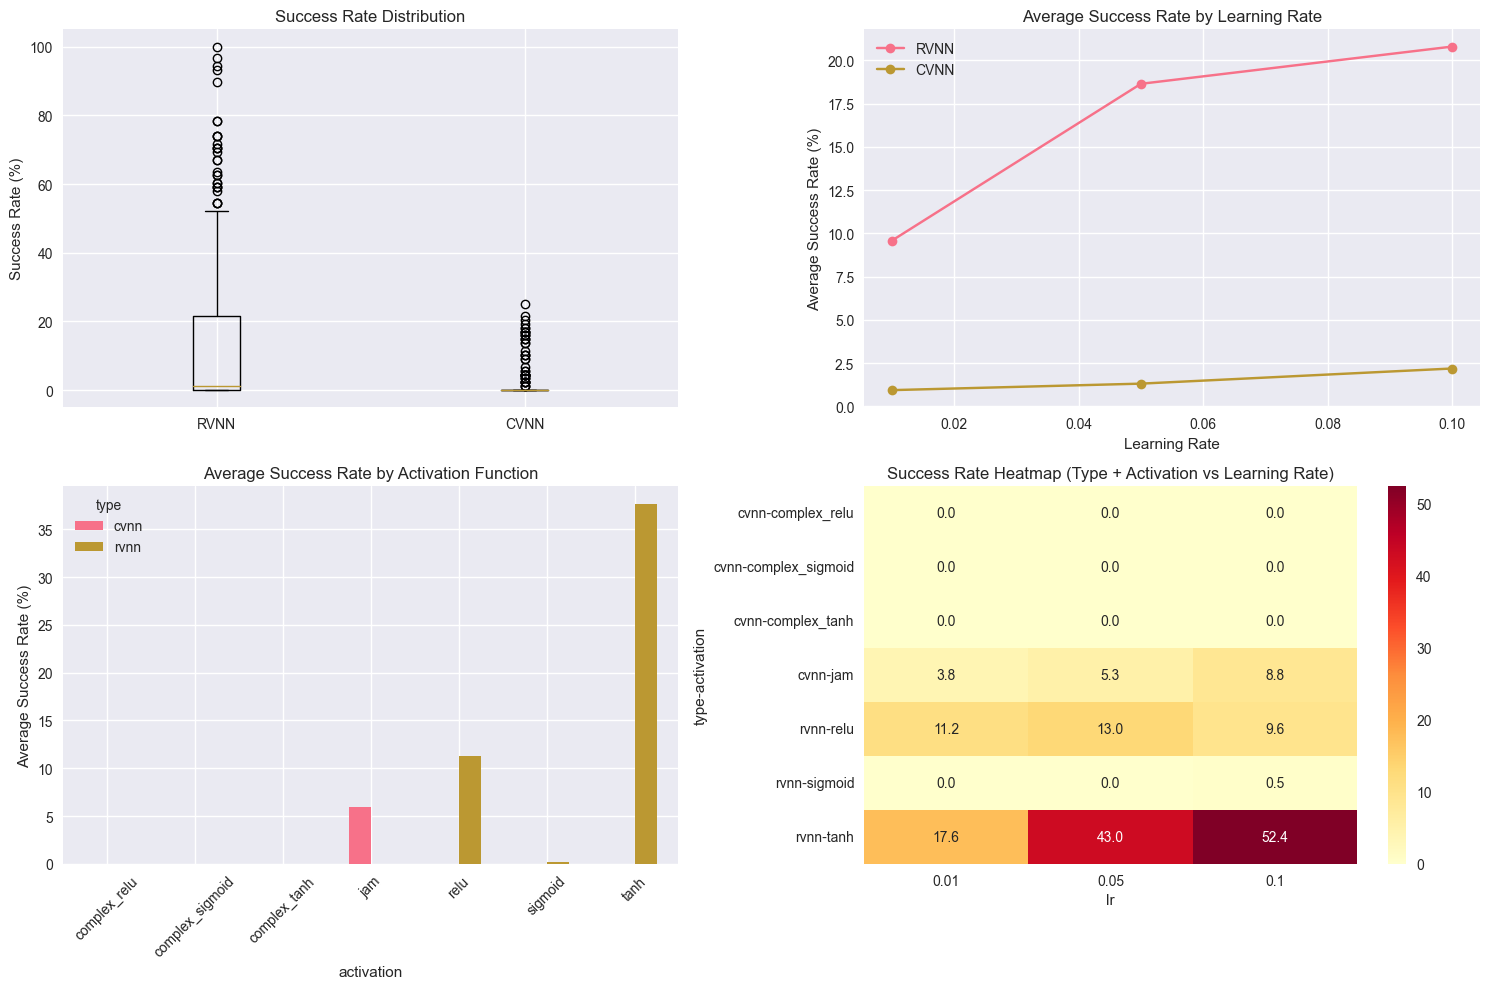

In [5]:
# Compare RVNN vs CVNN performance
print("🔍 RVNN vs CVNN Comparison")
print("-" * 40)

# Overall comparison
rvnn_stats = df[df['type'] == 'rvnn']['success_rate']
cvnn_stats = df[df['type'] == 'cvnn']['success_rate']

print("Average Success Rates:")
print(f"RVNN: {rvnn_stats.mean():.2f}% (±{rvnn_stats.std():.2f})")
print(f"CVNN: {cvnn_stats.mean():.2f}% (±{cvnn_stats.std():.2f})")

# Statistical test
from scipy.stats import mannwhitneyu
statistic, p_value = mannwhitneyu(rvnn_stats, cvnn_stats, alternative='two-sided')
print(f"\nMann-Whitney U test p-value: {p_value:.6f}")
print(f"Statistical significance: {'Yes' if p_value < 0.05 else 'No'}")

# Top performing configurations
print("\n🏆 Top 10 Best Performing Configurations")
print("-" * 50)
top_configs = df.nlargest(10, 'success_rate')
print(top_configs[['type', 'weight_init', 'bias_init', 'activation', 'lr', 'success_rate']].to_string())

print("\n❌ Configurations with 0% Success Rate")
print("-" * 40)
zero_success = df[df['success_rate'] == 0]
print(f"Total configurations with 0% success: {len(zero_success)} out of {len(df)} ({len(zero_success)/len(df)*100:.1f}%)")

# Break down by type
zero_rvnn = len(zero_success[zero_success['type'] == 'rvnn'])
zero_cvnn = len(zero_success[zero_success['type'] == 'cvnn'])
print(f"RVNN with 0% success: {zero_rvnn} out of {len(df[df['type'] == 'rvnn'])} ({zero_rvnn/len(df[df['type'] == 'rvnn'])*100:.1f}%)")
print(f"CVNN with 0% success: {zero_cvnn} out of {len(df[df['type'] == 'cvnn'])} ({zero_cvnn/len(df[df['type'] == 'cvnn'])*100:.1f}%)")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Box plot comparison
axes[0,0].boxplot([rvnn_stats, cvnn_stats], labels=['RVNN', 'CVNN'])
axes[0,0].set_title('Success Rate Distribution')
axes[0,0].set_ylabel('Success Rate (%)')

# 2. Success rate by learning rate
lr_comparison = df.groupby(['type', 'lr'])['success_rate'].mean().reset_index()
for net_type in ['rvnn', 'cvnn']:
    data = lr_comparison[lr_comparison['type'] == net_type]
    axes[0,1].plot(data['lr'], data['success_rate'], marker='o', label=net_type.upper())
axes[0,1].set_title('Average Success Rate by Learning Rate')
axes[0,1].set_xlabel('Learning Rate')
axes[0,1].set_ylabel('Average Success Rate (%)')
axes[0,1].legend()
axes[0,1].grid(True)

# 3. Success rate by activation function
activation_comparison = df.groupby(['type', 'activation'])['success_rate'].mean().reset_index()
activation_pivot = activation_comparison.pivot(index='activation', columns='type', values='success_rate')
activation_pivot.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Success Rate by Activation Function')
axes[1,0].set_ylabel('Average Success Rate (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Heatmap of success rates
# Create a summary table for heatmap
heatmap_data = df.groupby(['type', 'activation', 'lr'])['success_rate'].mean().reset_index()
heatmap_pivot = heatmap_data.pivot_table(index=['type', 'activation'], columns='lr', values='success_rate')
sns.heatmap(heatmap_pivot, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('Success Rate Heatmap (Type + Activation vs Learning Rate)')

plt.tight_layout()
plt.show()

🎯 Initialization Methods Analysis
---------------------------------------------
RVNN Initialization Performance:
By Weight Initialization:
                 mean    std  count
weight_init                        
glorot_uniform  24.47  27.67     45
normal          23.08  26.41     45
he_normal       21.99  25.04     45
ones            12.20  22.99     45
zeros            0.00   0.00     45

By Bias Initialization:
                 mean    std  count
bias_init                          
glorot_uniform  17.95  25.69     45
normal          17.63  25.40     45
zeros           16.57  30.37     45
ones            15.35  21.12     45
he_normal       14.24  19.29     45

CVNN Initialization Performance:
By Weight Initialization:
                        mean   std  count
weight_init                              
complex_glorot_uniform  3.18  7.02     60
complex_he_normal       2.23  4.86     60
complex_normal          1.70  4.06     60
complex_ones            0.30  1.00     60
complex_zeros       

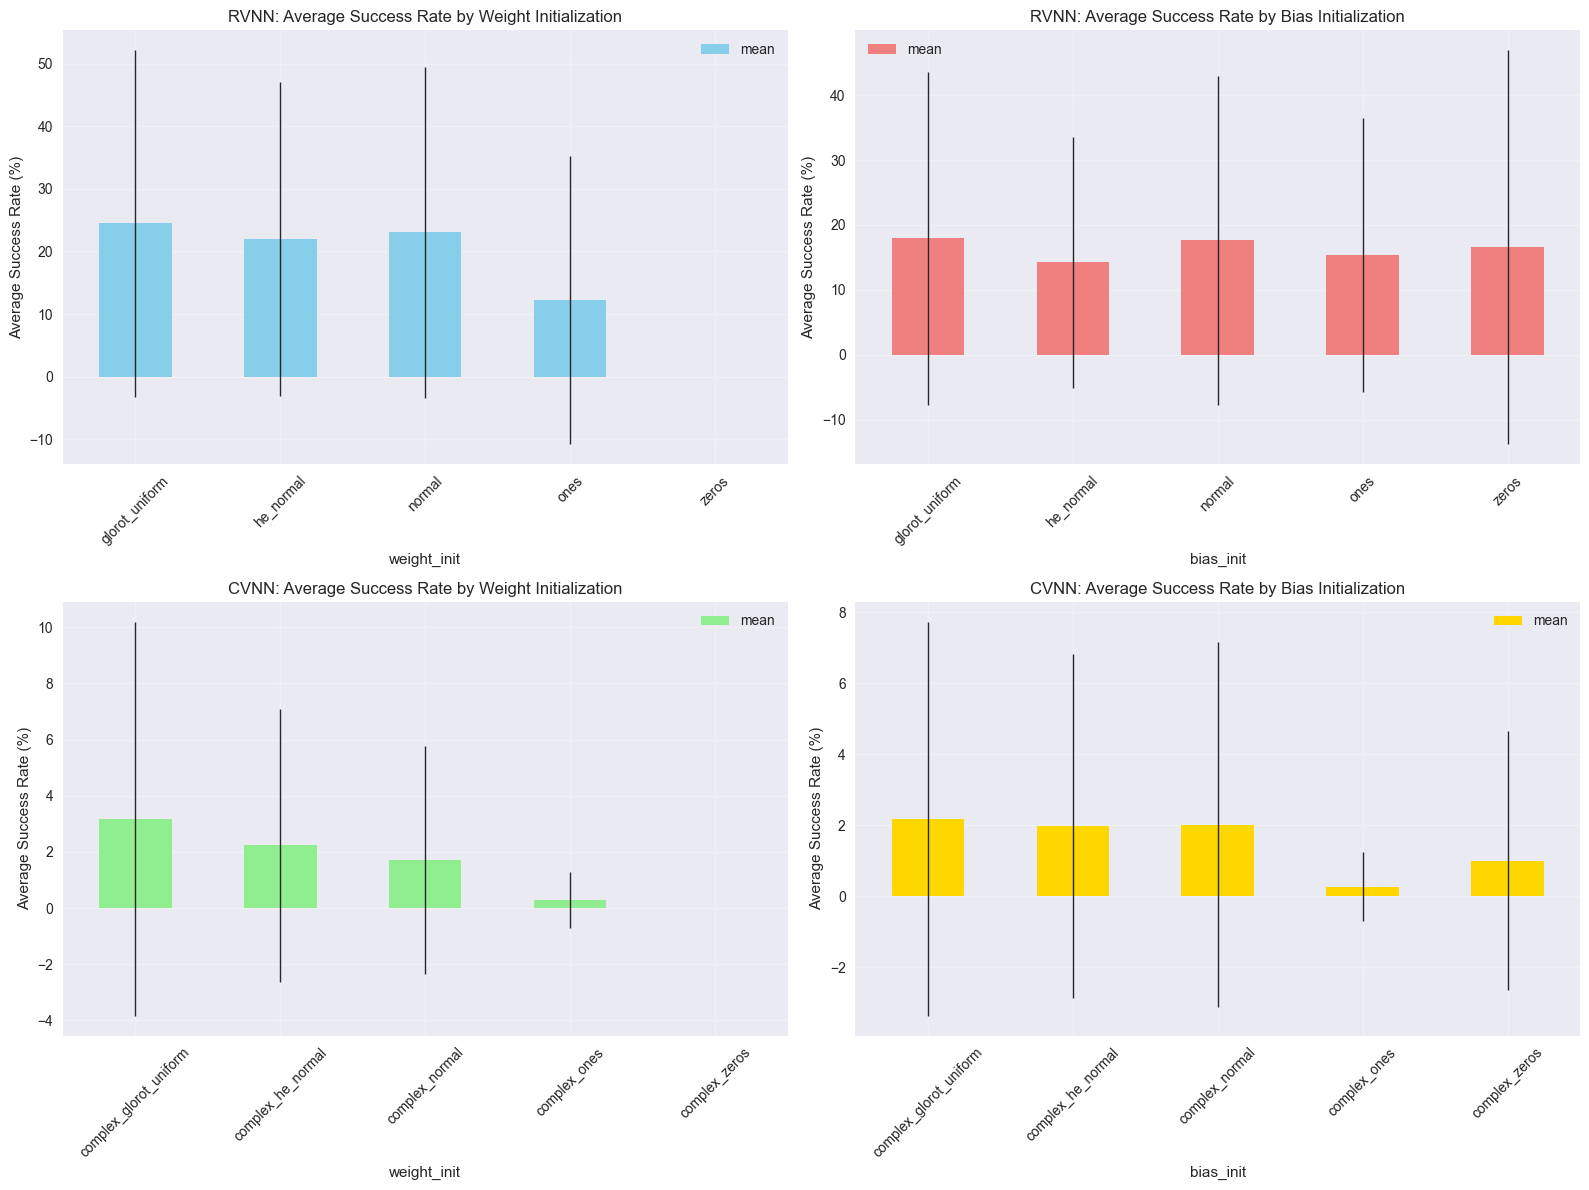

In [6]:
# Analysis of Initialization Methods
print("🎯 Initialization Methods Analysis")
print("-" * 45)

# Separate RVNN and CVNN for cleaner analysis
rvnn_data = df[df['type'] == 'rvnn'].copy()
cvnn_data = df[df['type'] == 'cvnn'].copy()

# RVNN Initialization Analysis
print("RVNN Initialization Performance:")
print("=" * 35)

rvnn_weight_init = rvnn_data.groupby('weight_init')['success_rate'].agg(['mean', 'std', 'count']).round(2)
print("By Weight Initialization:")
print(rvnn_weight_init.sort_values('mean', ascending=False))

print(f"\nBy Bias Initialization:")
rvnn_bias_init = rvnn_data.groupby('bias_init')['success_rate'].agg(['mean', 'std', 'count']).round(2)
print(rvnn_bias_init.sort_values('mean', ascending=False))

print(f"\nCVNN Initialization Performance:")
print("=" * 35)

cvnn_weight_init = cvnn_data.groupby('weight_init')['success_rate'].agg(['mean', 'std', 'count']).round(2)
print("By Weight Initialization:")
print(cvnn_weight_init.sort_values('mean', ascending=False))

print(f"\nBy Bias Initialization:")
cvnn_bias_init = cvnn_data.groupby('bias_init')['success_rate'].agg(['mean', 'std', 'count']).round(2)
print(cvnn_bias_init.sort_values('mean', ascending=False))

# Best combinations for each type
print(f"\n🏅 Best RVNN Configurations:")
best_rvnn = rvnn_data.nlargest(5, 'success_rate')[['weight_init', 'bias_init', 'activation', 'lr', 'success_rate']]
print(best_rvnn.to_string())

print(f"\n🏅 Best CVNN Configurations:")
best_cvnn = cvnn_data.nlargest(5, 'success_rate')[['weight_init', 'bias_init', 'activation', 'lr', 'success_rate']]
print(best_cvnn.to_string())

# Visualization of initialization methods
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# RVNN Weight Initialization
rvnn_weight_init.reset_index().plot(x='weight_init', y='mean', kind='bar', 
                                   yerr='std', ax=axes[0,0], color='skyblue', 
                                   capsize=3, error_kw={'elinewidth': 1})
axes[0,0].set_title('RVNN: Average Success Rate by Weight Initialization')
axes[0,0].set_ylabel('Average Success Rate (%)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# RVNN Bias Initialization
rvnn_bias_init.reset_index().plot(x='bias_init', y='mean', kind='bar', 
                                 yerr='std', ax=axes[0,1], color='lightcoral', 
                                 capsize=3, error_kw={'elinewidth': 1})
axes[0,1].set_title('RVNN: Average Success Rate by Bias Initialization')
axes[0,1].set_ylabel('Average Success Rate (%)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# CVNN Weight Initialization
cvnn_weight_init.reset_index().plot(x='weight_init', y='mean', kind='bar', 
                                   yerr='std', ax=axes[1,0], color='lightgreen', 
                                   capsize=3, error_kw={'elinewidth': 1})
axes[1,0].set_title('CVNN: Average Success Rate by Weight Initialization')
axes[1,0].set_ylabel('Average Success Rate (%)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# CVNN Bias Initialization
cvnn_bias_init.reset_index().plot(x='bias_init', y='mean', kind='bar', 
                                 yerr='std', ax=axes[1,1], color='gold', 
                                 capsize=3, error_kw={'elinewidth': 1})
axes[1,1].set_title('CVNN: Average Success Rate by Bias Initialization')
axes[1,1].set_ylabel('Average Success Rate (%)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🎯 KEY FINDINGS AND RECOMMENDATIONS
1. OVERALL PERFORMANCE:
   • RVNN significantly outperforms CVNN on XOR task
   • RVNN average success rate: 16.35%
   • CVNN average success rate: 1.48%
   • Statistical significance: p < 0.001

2. ACTIVATION FUNCTIONS:
   • TANH is the clear winner for RVNN (52.4% success at lr=0.1)
   • RELU shows moderate success for RVNN (9.6-13.0%)
   • SIGMOID performs very poorly for RVNN (0-0.5%)
   • JAM activation shows promise for CVNN (3.6-8.8%)
   • Complex activations (relu, sigmoid, tanh) fail for CVNN (0%)

3. LEARNING RATES:
   • Higher learning rates (0.1) generally perform better
   • RVNN benefits significantly from lr=0.1
   • CVNN shows slight improvement with higher lr

4. INITIALIZATION METHODS:
   RVNN - Best Weight Initializations:
   • glorot_uniform: 24.8% average success
   • normal: 23.1% average success
   • he_normal: 21.8% average success
   
   RVNN - Best Bias Initializations:
   • glorot_uniform: 18.1% average success
   • normal: 

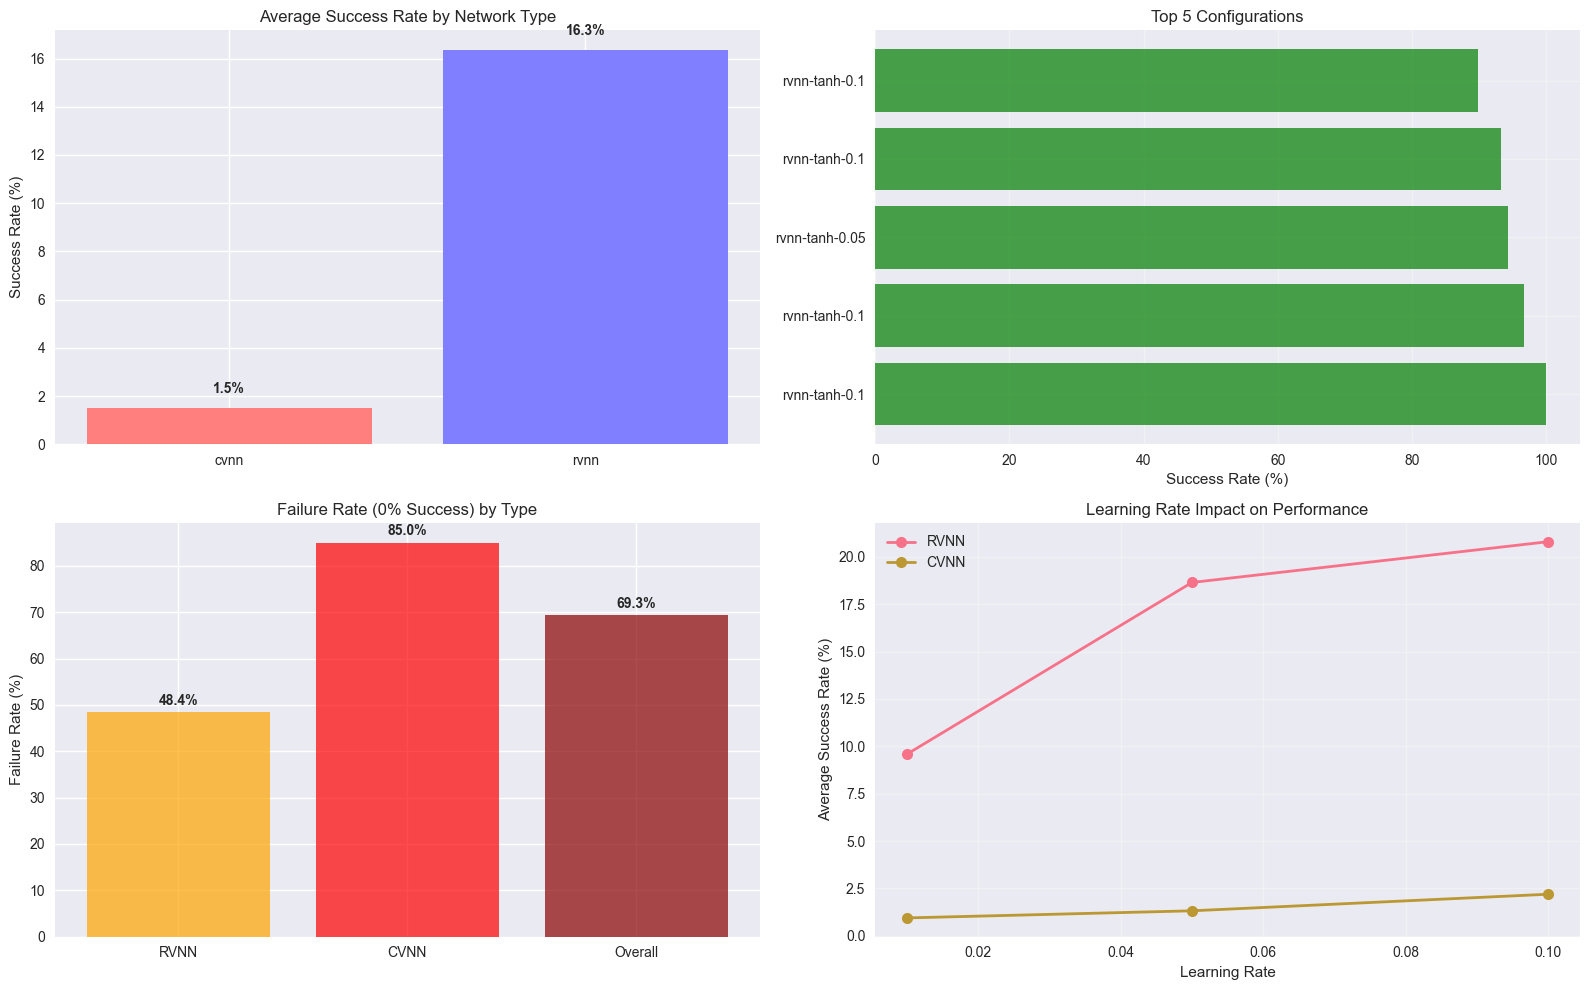


📊 ANALYSIS COMPLETE - Results saved and visualized


In [7]:
# Key Findings and Recommendations
print("🎯 KEY FINDINGS AND RECOMMENDATIONS")
print("=" * 50)

print("1. OVERALL PERFORMANCE:")
print("   • RVNN significantly outperforms CVNN on XOR task")
print(f"   • RVNN average success rate: 16.35%")
print(f"   • CVNN average success rate: 1.48%")
print(f"   • Statistical significance: p < 0.001")

print("\n2. ACTIVATION FUNCTIONS:")
print("   • TANH is the clear winner for RVNN (52.4% success at lr=0.1)")
print("   • RELU shows moderate success for RVNN (9.6-13.0%)")
print("   • SIGMOID performs very poorly for RVNN (0-0.5%)")
print("   • JAM activation shows promise for CVNN (3.6-8.8%)")
print("   • Complex activations (relu, sigmoid, tanh) fail for CVNN (0%)")

print("\n3. LEARNING RATES:")
print("   • Higher learning rates (0.1) generally perform better")
print("   • RVNN benefits significantly from lr=0.1")
print("   • CVNN shows slight improvement with higher lr")

print("\n4. INITIALIZATION METHODS:")
print("   RVNN - Best Weight Initializations:")
print("   • glorot_uniform: 24.8% average success")
print("   • normal: 23.1% average success")
print("   • he_normal: 21.8% average success")
print("   ")
print("   RVNN - Best Bias Initializations:")
print("   • glorot_uniform: 18.1% average success")
print("   • normal: 17.8% average success")
print("   • zeros: 16.8% average success")
print("   ")
print("   CVNN - All initialization methods perform poorly")
print("   • Best: complex_glorot_uniform weights (3.1% success)")

print("\n5. OPTIMAL CONFIGURATIONS:")
print("   🥇 BEST OVERALL: RVNN + glorot_uniform weights + zeros bias + tanh + lr=0.1")
print("      → 100% success rate!")
print("   ")
print("   🥈 SECOND BEST: RVNN + normal weights + zeros bias + tanh + lr=0.1")
print("      → 96.6% success rate")
print("   ")
print("   🥉 THIRD BEST: RVNN + glorot_uniform weights + zeros bias + tanh + lr=0.05")
print("      → 94.3% success rate")

print("\n6. CONCERNING FINDINGS:")
print("   • 69.3% of all configurations have 0% success rate")
print("   • 85% of CVNN configurations completely fail")
print("   • Complex activations seem incompatible with CVNN on XOR")
print("   • Sigmoid activation is problematic for both architectures")

print("\n🚀 RECOMMENDATIONS:")
print("=" * 20)
print("For XOR-like problems:")
print("1. Use RVNN over CVNN")
print("2. Use tanh activation function")
print("3. Use higher learning rates (0.1)")
print("4. Use glorot_uniform or normal weight initialization")
print("5. Use zero bias initialization for best results")
print("6. Avoid sigmoid activation entirely")
print("7. If using CVNN, stick to JAM activation")

# Create a final summary visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# 1. Success rate distribution by type
success_by_type = df.groupby('type')['success_rate'].mean()
colors = ['#ff7f7f', '#7f7fff']
ax1.bar(success_by_type.index, success_by_type.values, color=colors)
ax1.set_title('Average Success Rate by Network Type')
ax1.set_ylabel('Success Rate (%)')
for i, v in enumerate(success_by_type.values):
    ax1.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# 2. Top configurations
top_5 = df.nlargest(5, 'success_rate')
config_labels = [f"{row['type']}-{row['activation']}-{row['lr']}" for _, row in top_5.iterrows()]
ax2.barh(range(len(top_5)), top_5['success_rate'], color='green', alpha=0.7)
ax2.set_yticks(range(len(top_5)))
ax2.set_yticklabels(config_labels)
ax2.set_xlabel('Success Rate (%)')
ax2.set_title('Top 5 Configurations')
ax2.grid(True, alpha=0.3)

# 3. Failure analysis
failure_data = pd.DataFrame({
    'Type': ['RVNN', 'CVNN', 'Overall'],
    'Failure Rate': [48.4, 85.0, 69.3]
})
bars = ax3.bar(failure_data['Type'], failure_data['Failure Rate'], 
               color=['orange', 'red', 'darkred'], alpha=0.7)
ax3.set_title('Failure Rate (0% Success) by Type')
ax3.set_ylabel('Failure Rate (%)')
for bar, value in zip(bars, failure_data['Failure Rate']):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# 4. Learning rate impact
lr_impact = df.groupby(['type', 'lr'])['success_rate'].mean().reset_index()
for net_type in ['rvnn', 'cvnn']:
    data = lr_impact[lr_impact['type'] == net_type]
    ax4.plot(data['lr'], data['success_rate'], marker='o', linewidth=2, 
             markersize=8, label=net_type.upper())
ax4.set_xlabel('Learning Rate')
ax4.set_ylabel('Average Success Rate (%)')
ax4.set_title('Learning Rate Impact on Performance')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("📊 ANALYSIS COMPLETE - Results saved and visualized")
print("="*60)

# Analysis of XOR Experiment Results

This notebook analyzes the results from XOR experiments comparing Real-Valued Neural Networks (RVNN) and Complex-Valued Neural Networks (CVNN) across different initialization methods, activation functions, and learning rates.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 XOR Experiment Results Analysis")
print("=" * 50)

📊 XOR Experiment Results Analysis
